In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from matplotlib import style
import seaborn as sns

# Loading the Data & Initial Analysis

In [2]:
read_df = pd.read_csv("transaction_data.csv")
df = read_df.copy()
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


Seeing how many items are bought with the same transaction ID

In [3]:
df[df["TransactionId"] == 6355745]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
9713,278166,6355745,Sat Feb 02 12:50:00 IST 2019,487494,JINGLE BELL HEART ANTIQUE GOLD,3,2.88,United Kingdom
20729,278166,6355745,Sat Feb 02 12:50:00 IST 2019,490686,SET 12 COLOURING PENCILS DOILY,3,0.90,United Kingdom
22385,278166,6355745,Sat Feb 02 12:50:00 IST 2019,460593,PINK VINTAGE PAISLEY PICNIC BAG,3,2.28,United Kingdom
32990,278166,6355745,Sat Feb 02 12:50:00 IST 2019,495201,JUMBO BAG PAISLEY PARK,30,2.88,United Kingdom
60508,278166,6355745,Sat Feb 02 12:50:00 IST 2019,491484,HOME SWEET HOME BLACKBOARD,6,6.84,United Kingdom
82198,278166,6355745,Sat Feb 02 12:50:00 IST 2019,493584,PLAYING CARDS JUBILEE UNION JACK,6,1.73,United Kingdom
104287,278166,6355745,Sat Feb 02 12:50:00 IST 2019,487221,JUMBO BAG ALPHABET,3,2.88,United Kingdom
106268,278166,6355745,Sat Feb 02 12:50:00 IST 2019,442680,SET/20 RED RETROSPOT PAPER NAPKINS,6,1.18,United Kingdom
109003,278166,6355745,Sat Feb 02 12:50:00 IST 2019,460572,SCANDINAVIAN PAISLEY PICNIC BAG,3,2.28,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


In [5]:
df.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06
mean,2.410162e+05,6.159417e+06,6.582687e+05,2.865675e+01,9.498798e+00
std,1.423364e+05,1.476341e+05,4.526314e+05,6.542432e+02,2.308139e+03
min,-1.000000e+00,5.900015e+06,-1.000000e+00,-2.429850e+05,-1.526564e+04
25%,2.593920e+05,6.026856e+06,4.609080e+05,3.000000e+00,1.730000e+00
50%,3.020220e+05,6.166611e+06,4.752930e+05,9.000000e+00,2.880000e+00
75%,3.413550e+05,6.289569e+06,4.889430e+05,3.000000e+01,5.700000e+00
max,3.840270e+05,6.397457e+06,1.894494e+06,2.429850e+05,1.696285e+06


We can see that the minimum values are negative which are invalid values or outliers.

# Data Cleaning

In [6]:
df = df[df.UserId > 0]
df = df[df.ItemCode > 0]
df = df[df.CostPerItem > 0]
df = df[df.NumberOfItemsPurchased > 0]
df = df[df.ItemDescription.notna()]
df = df[df.TransactionTime.str[-4:] <= '2021']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790726 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   UserId                  790726 non-null  int64  
 1   TransactionId           790726 non-null  int64  
 2   TransactionTime         790726 non-null  object 
 3   ItemCode                790726 non-null  int64  
 4   ItemDescription         790726 non-null  object 
 5   NumberOfItemsPurchased  790726 non-null  int64  
 6   CostPerItem             790726 non-null  float64
 7   Country                 790726 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 54.3+ MB


In [8]:
df.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,790726.000000,7.907260e+05,7.907260e+05,790726.000000,7.907260e+05
mean,321323.183748,6.167517e+06,6.456300e+05,38.987381,8.274393e+00
std,35893.894828,1.437437e+05,4.326222e+05,539.468462,2.697744e+03
min,259266.000000,5.900015e+06,4.200000e+01,3.000000,6.000000e-02
25%,293475.000000,6.042091e+06,4.625670e+05,6.000000,1.730000e+00
50%,318339.000000,6.180988e+06,4.759860e+05,18.000000,2.700000e+00
75%,352800.000000,6.293133e+06,4.886910e+05,36.000000,5.180000e+00
max,384027.000000,6.397457e+06,1.894494e+06,242985.000000,1.696285e+06


# EDA

In [12]:
df.TransactionTime = pd.to_datetime(df.TransactionTime)
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
5,285957,6307136,2019-01-11 09:50:00,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom


Aim: We need to plot a graph where we need to plot number of transactions over the time in each month of years.

For that, 
1. we need to extract year-month from the TransactionTime column. 
2. Number of unique transactions in an year-month wise

In [13]:
df['month_year'] = pd.to_datetime(df.TransactionTime).dt.to_period('M')

In [14]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,month_year
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,2019-02
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,2018-12
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,2019-02
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,2018-06
5,285957,6307136,2019-01-11 09:50:00,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,2019-01


In [15]:
df.sort_values(by= ['month_year'], inplace=True)

In [16]:
num_trans = df.groupby(['month_year']).TransactionId.nunique()
num_trans

month_year
2018-02    1198
2018-03     629
2018-04    1041
2018-05    1157
2018-06    1365
2018-07    1399
2018-08    1405
2018-09    1273
2018-10    1361
2018-11    1350
2018-12    1994
2019-01    2360
2019-02    1802
Freq: M, Name: TransactionId, dtype: int64

In [17]:
x_axis = np.arange(0, len(num_trans), 1) # Preparing the X-axis
x_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Text(0, 0.5, 'No. of transactions')

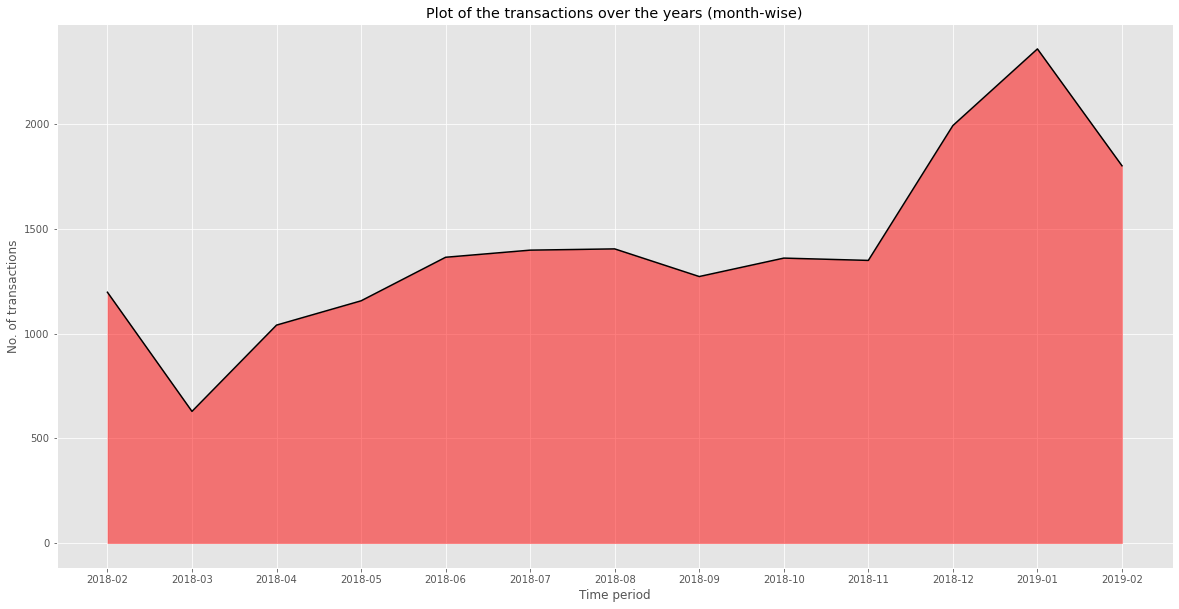

In [18]:
style.use('ggplot')
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(111)
ax1.plot(x_axis, num_trans, color = 'k')
ax1.fill_between(x_axis, num_trans, color = 'r', alpha = 0.5)
ax1.set_xticks(x_axis)
ax1.set_xticklabels(num_trans.index)
plt.title('Plot of the transactions over the years (month-wise)')
plt.xlabel('Time period')
plt.ylabel('No. of transactions')

**Inference:** As we can see, as the time advances the online retailer is getting more and more purchases which maxed in the month of Jan’19.

In [19]:
# Lets explore the no. of items bought in each transaction. 
# Grouping all the entries by TransactionId, then 
item_each_trans = df.groupby(by=['TransactionId']).ItemDescription.nunique()
item_each_trans.describe()

count    18334.000000
mean        21.014236
std         23.838977
min          1.000000
25%          7.000000
50%         15.000000
75%         27.000000
max        540.000000
Name: ItemDescription, dtype: float64

As we can see that,  

In [26]:
asdf = df.groupby(by=['TransactionId']).ItemDescription
asdf.head()

958864          GINGERBREAD MAN COOKIE CUTTER
326946          HAND WARMER SCOTTY DOG DESIGN
1014949           6 RIBBONS SHIMMERING PINKS 
915969                JUMBO BAG RED RETROSPOT
556809            GREY HEART HOT WATER BOTTLE
                          ...                
788824        DISCO BALL CHRISTMAS DECORATION
178989     WHITE HANGING HEART T-LIGHT HOLDER
179233               RED METAL BOX TOP SECRET
796682                 JUMBO BAG PAISLEY PARK
796897                          PARTY BUNTING
Name: ItemDescription, Length: 87051, dtype: object

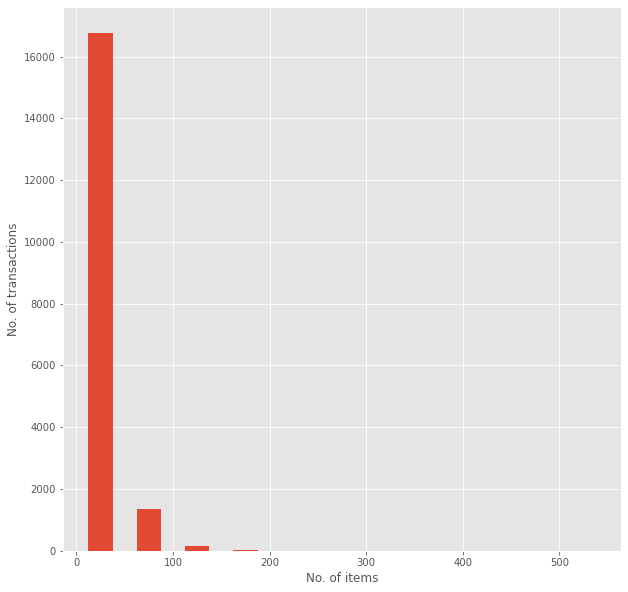

In [27]:
bins = [0,50,100,150,200,250,300,350,400,450,500,550]
fig = plt.figure(figsize = (10,10))
plt.hist(item_each_trans, bins, histtype = 'bar', rwidth = 0.5)
plt.xlabel('No. of items')
plt.ylabel('No. of transactions')
plt.show()

Oops! We can see that most of the transactions include items between 0–100 and some between 100–200. The max items transactions shown above probably is an outlier or is a customer who purchases in a large scale. So we need to re-scale our histogram.

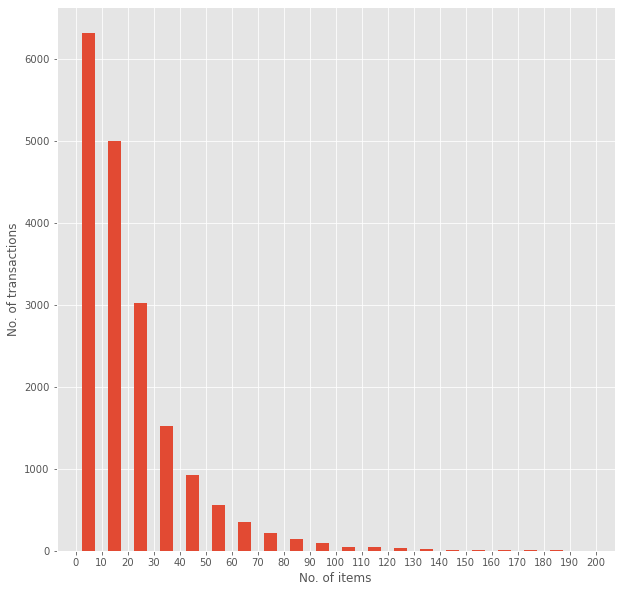

In [29]:
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)
ax1.hist(item_each_trans, bins, histtype = 'bar', rwidth = 0.5)
ax1.set_xticks(bins)
plt.xlabel('No. of items')
plt.ylabel('No. of transactions')
plt.show()

As we can see most transactions included less than 10 items.

In [41]:
df['total_cost_item'] = df.NumberOfItemsPurchased*df.CostPerItem # Total cost calculation
item_each_trans = df.groupby('ItemDescription').total_cost_item.sum()

<BarContainer object of 10 artists>

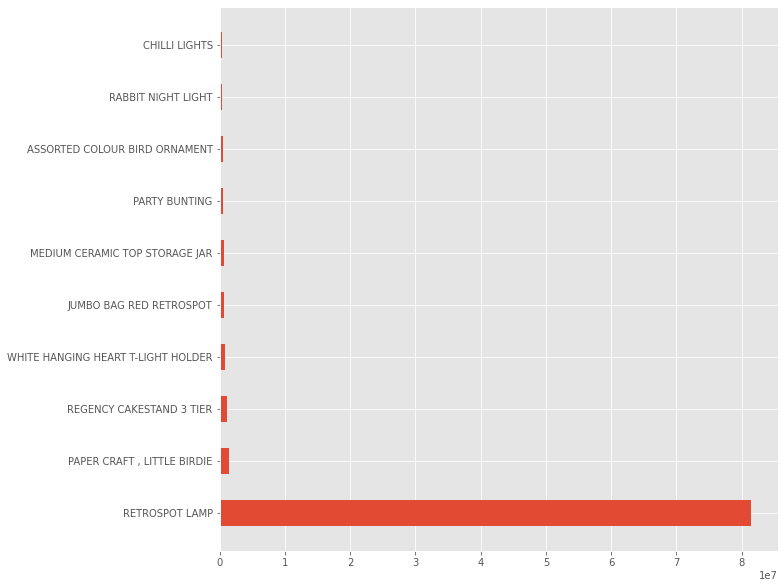

In [42]:
item_each_trans.sort_values(ascending = False, inplace = True)
item_each_trans = item_each_trans[:10]
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.barh(item_each_trans.index, item_each_trans, height = 0.5)

In [46]:
print("Number of unique TransactionId's is: {}".format(df.TransactionId.nunique()))
print("Number of unique ItemDescription's is: {}".format(df.ItemDescription.nunique()))
# There are 3871 num of unique items in total. 

Number of unique TransactionId's is: 18334
Number of unique ItemDescription's is: 3871


Now that we have our data after all the pre-processing, lets arrange it with the TransactionId’s as the index and the ItemDescriptions as the columns with the total no. of items bought in each transaction of each item as the data-point.

In [54]:
df_set = df.groupby(by=['TransactionId', 'ItemDescription']).NumberOfItemsPurchased.sum()\
#                 .unstack().reset_index().fillna(0).set_index('TransactionId') 
df_set.head(30)

TransactionId  ItemDescription                    
5900015        CREAM CUPID HEARTS COAT HANGER          48
               GLASS STAR FROSTED T-LIGHT HOLDER       36
               KNITTED UNION FLAG HOT WATER BOTTLE     36
               RED WOOLLY HOTTIE WHITE HEART.          36
               SET 7 BABUSHKA NESTING BOXES            12
               WHITE HANGING HEART T-LIGHT HOLDER      36
               WHITE METAL LANTERN                     36
5900026        HAND WARMER RED POLKA DOT               36
               HAND WARMER UNION JACK                  36
5900037        ASSORTED COLOUR BIRD ORNAMENT          192
               BOX OF 6 ASSORTED COLOUR TEASPOONS      36
               BOX OF VINTAGE ALPHABET BLOCKS          12
               BOX OF VINTAGE JIGSAW BLOCKS            18
               DOORMAT NEW ENGLAND                     24
               FELTCRAFT PRINCESS CHARLOTTE DOLL       48
               HOME BUILDING BLOCK WORD                18
               IVORY 

In [55]:
df_set = df.groupby(by=['TransactionId', 'ItemDescription']).NumberOfItemsPurchased.sum()\
                 .unstack()#.reset_index().fillna(0).set_index('TransactionId') 
df_set.head(30)

ItemDescription,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
TransactionId,,,,,,,,,,,,,,,,,,,,,
5900015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5900026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5900037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5900048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5900059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5900070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5900081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5900092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5900103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df_set = df.groupby(by=['TransactionId', 'ItemDescription']).NumberOfItemsPurchased.sum()\
                 .unstack().reset_index().fillna(0).set_index('TransactionId') 
df_set.head(10)

ItemDescription,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
TransactionId,,,,,,,,,,,,,,,,,,,,,
5900015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5900026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5900037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5900048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5900059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5900070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5900081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5900092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5900103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We need to make sure that any positive values are encoded to one and all the negative values(if any) to zero.

In [59]:
def encode(x):
    if x <= 0: return 0
    else: return 1
df_set = df_set.applymap(encode)
df_set

ItemDescription,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
TransactionId,,,,,,,,,,,,,,,,,,,,,
5900015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6397413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6397424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6397435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


Dataset is ready to apply Apriori algorithm

In [69]:
frequent_itemsets = apriori(df_set, min_support=0.02, use_colnames=True)

In [70]:
frequent_itemsets

,support,itemsets
0,0.021926,(3 STRIPEY MICE FELTCRAFT)
1,0.039435,(6 RIBBONS RUSTIC CHARM)
2,0.025308,(60 CAKE CASES VINTAGE CHRISTMAS)
3,0.035726,(60 TEATIME FAIRY CAKE CASES)
4,0.027217,(72 SWEETHEART FAIRY CAKE CASES)
...,...,...
238,0.023781,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC..."
239,0.024654,"(RED HANGING HEART T-LIGHT HOLDER, WHITE HANGI..."
240,0.022854,"(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU..."
241,0.025526,"(WOODEN FRAME ANTIQUE WHITE , WOODEN PICTURE F..."


In [72]:
top_items = frequent_itemsets.sort_values('support', ascending = False)[:20]
top_items

,support,itemsets
191,0.106796,(WHITE HANGING HEART T-LIGHT HOLDER)
153,0.092560,(REGENCY CAKESTAND 3 TIER)
81,0.086997,(JUMBO BAG RED RETROSPOT)
124,0.075215,(PARTY BUNTING)
11,0.074615,(ASSORTED COLOUR BIRD ORNAMENT)
102,0.070197,(LUNCH BAG RED RETROSPOT)
165,0.062507,(SET OF 3 CAKE TINS PANTRY DESIGN )
95,0.057216,(LUNCH BAG BLACK SKULL.)
116,0.055798,(PACK OF 72 RETROSPOT CAKE CASES)
179,0.054707,(SPOTTY BUNTING)


D:\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Text(0, 0.5, 'Support')

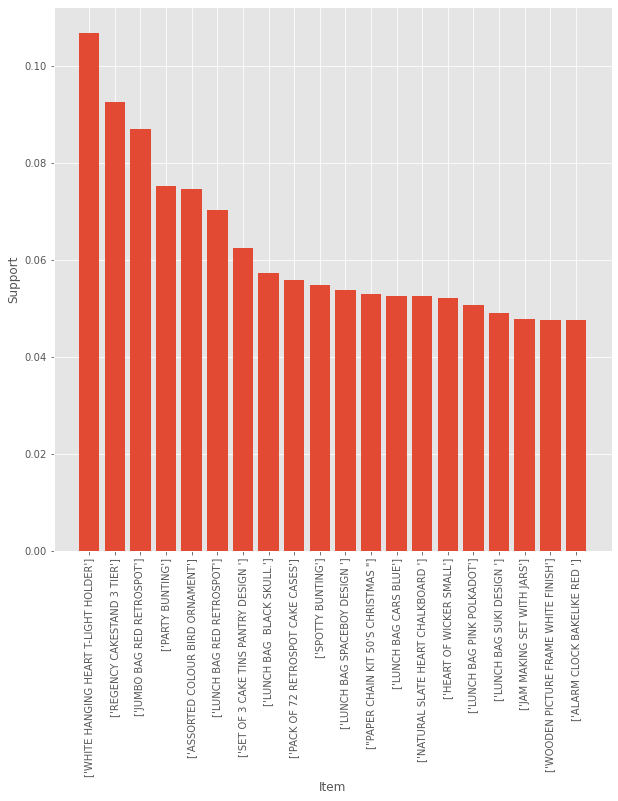

In [73]:
for i in range(len(top_items.itemsets)):
    top_items.itemsets.iloc[i] = str(list(top_items.itemsets.iloc[i]))
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.bar(top_items.itemsets, top_items.support)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.xlabel('Item')
plt.ylabel('Support')

Applying now Association Rules to the dataset

In [75]:
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.047562,0.042817,0.028744,0.604358,14.115027,0.026708,2.419316
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.042817,0.047562,0.028744,0.671338,14.115027,0.026708,2.897922
2,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK),0.047562,0.033272,0.021436,0.450688,13.545763,0.019853,1.759890
3,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.033272,0.047562,0.021436,0.644262,13.545763,0.019853,2.677361
4,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.033599,0.038344,0.023126,0.688312,17.950934,0.021838,3.085313
...,...,...,...,...,...,...,...,...,...
73,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.029508,0.030326,0.021272,0.720887,23.771127,0.020377,3.474129
74,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.023781,0.037690,0.021272,0.894495,23.733255,0.020376,9.121030
75,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",0.037690,0.023781,0.021272,0.564399,23.733255,0.020376,2.241088
76,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.030326,0.029508,0.021272,0.701439,23.771127,0.020377,3.250564


In [76]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,0.052802,0.052802,0.023610,0.491059,10.439266,0.020831,2.167219
std,0.017275,0.017275,0.002563,0.154387,5.517275,0.002684,1.219468
min,0.023781,0.023781,0.020017,0.220389,3.795831,0.016911,1.234347
25%,0.042653,0.042653,0.021354,0.394788,6.826048,0.019039,1.563931
50%,0.050780,0.050780,0.023126,0.459776,7.818302,0.020376,1.761469
75%,0.057216,0.057216,0.025063,0.596792,13.212154,0.022427,2.378366
max,0.106796,0.106796,0.029726,0.894495,23.771127,0.027900,9.121030


There are total of 78 RULES. 

In [84]:
top_rules = rules.sort_values(by='confidence', ascending=False)[:10]
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
74,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.023781,0.037690,0.021272,0.894495,23.733255,0.020376,9.121030
72,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.025090,0.042653,0.021272,0.847826,19.877293,0.020202,6.291137
9,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.030326,0.037690,0.025090,0.827338,21.951400,0.023947,5.573381
65,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.030326,0.042653,0.023781,0.784173,18.384938,0.022487,4.435708
12,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.037690,0.042653,0.029508,0.782923,18.355647,0.027900,4.410179
6,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.034635,0.041235,0.025254,0.729134,17.682461,0.023825,3.539627
73,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.029508,0.030326,0.021272,0.720887,23.771127,0.020377,3.474129
76,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.030326,0.029508,0.021272,0.701439,23.771127,0.020377,3.250564
13,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.042653,0.037690,0.029508,0.691816,18.355647,0.027900,3.122518
4,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.033599,0.038344,0.023126,0.688312,17.950934,0.021838,3.085313


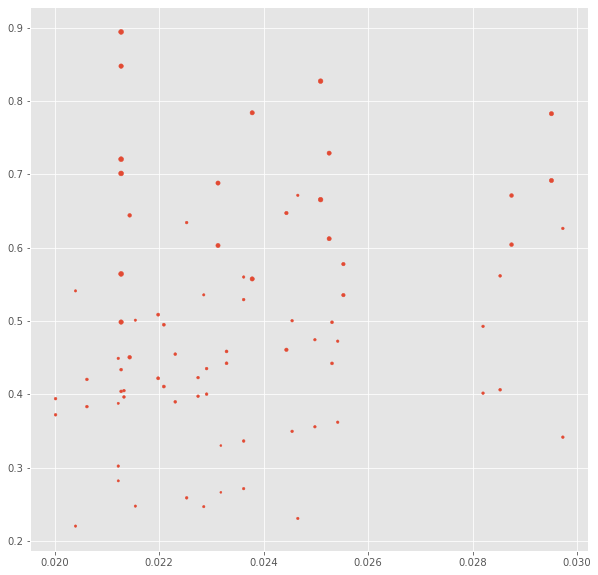

In [82]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(x=top_rules.support, y=top_rules.confidence, s=top_rules.lift)

In [85]:
import networkx as nx

**Plotting the rules in a Graph**

{'r': Text(-0.4906097261192729, 0.7234951795754636, 'r'),
 '0': Text(1.0, 0.018341154847546448, '0'),
 'ROSES REGENCY TEACUP AND SAUCER ': Text(0.6071763138630858, -0.723850840142892, 'ROSES REGENCY TEACUP AND SAUCER '),
 'r0': Text(0.1679293534145578, -0.8151097490185013, 'r0'),
 'PINK REGENCY TEACUP AND SAUCER': Text(-0.8650537047846764, -0.32296773471552387, 'PINK REGENCY TEACUP AND SAUCER'),
 'GREEN REGENCY TEACUP AND SAUCER': Text(0.23983663166734398, 0.9705650704785087, 'GREEN REGENCY TEACUP AND SAUCER'),
 '1': Text(0.5715277101483175, 0.7207155812202943, '1'),
 'r1': Text(-0.8996898781876146, -0.09188369001700117, 'r1'),
 '2': Text(-0.7274540558677102, 0.782635771443539, '2'),
 'r2': Text(0.9170786693578191, 0.2132968275628055, 'r2'),
 '3': Text(-0.45903850109829325, 0.9399952723669225, '3'),
 'r3': Text(0.8440646092389459, 0.41271654855382456, 'r3'),
 '4': Text(-0.6218214505296025, -0.6852647881339224, '4'),
 'r4': Text(-0.3024767232850926, -0.8385792936308232, 'r4'),
 '5': Tex

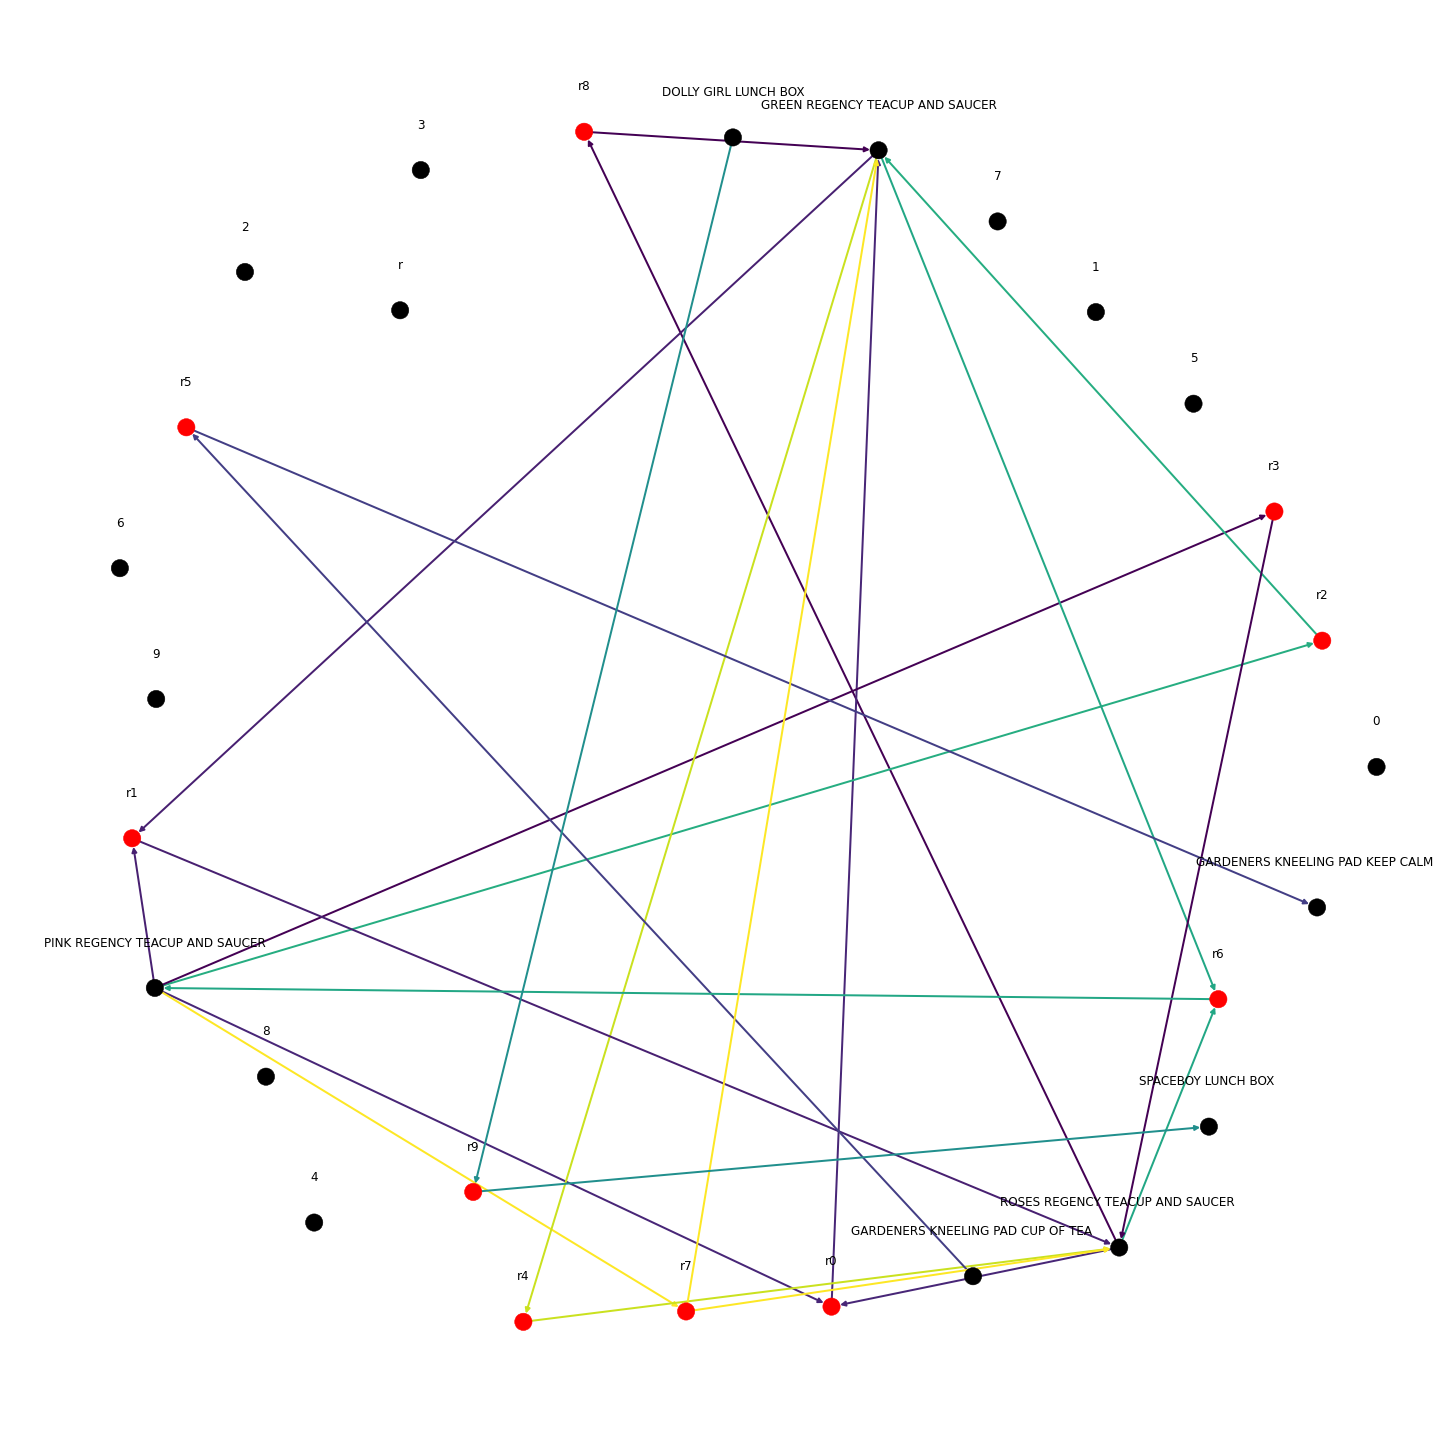

In [96]:
G1 = nx.DiGraph()
color_map = []
N = 50
colors = np.random.rand(N)
strs = ['r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9']
for i in range(10):
    G1.add_nodes_from('r'+str(i))
    for a in top_rules.iloc[i]['antecedents']:
        G1.add_nodes_from([a])
        G1.add_edge(a, 'r'+str(i), color = colors[i], weight = 2)
    for c in top_rules.iloc[i]['consequents']:
        G1.add_nodes_from([c])
        G1.add_edge('r'+str(i), c, color = colors[i], weight = 2)
for node in G1:
    found_a_string = False
    for item in strs:
        if node == item:
            found_a_string = True
    if found_a_string:
        color_map.append('red')
    else:
        color_map.append('black')
edges = G1.edges()
colors = [G1[u][v]['color'] for u,v in edges]
weights = [G1[u][v]['weight'] for u,v in edges]
pos = nx.spring_layout(G1, k = 16, scale = 1)
fig = plt.figure(figsize = (20,20))
nx.draw(G1, pos, edges = edges, node_color = color_map, edge_color = colors, width = weights, font_size = 16, with_labels = False)
for p in pos:
    pos[p][1] += 0.07
nx.draw_networkx_labels(G1, pos)

Here the mean value of lift and confidence are found to be 10.439266 and 0.491059 respectively.

In [98]:
rules[(rules.lift >= 10.439266) & (rules.confidence >= 0.491059)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.047562,0.042817,0.028744,0.604358,14.115027,0.026708,2.419316
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.042817,0.047562,0.028744,0.671338,14.115027,0.026708,2.897922
3,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.033272,0.047562,0.021436,0.644262,13.545763,0.019853,2.677361
4,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.033599,0.038344,0.023126,0.688312,17.950934,0.021838,3.085313
5,(SPACEBOY LUNCH BOX ),(DOLLY GIRL LUNCH BOX),0.038344,0.033599,0.023126,0.603129,17.950934,0.021838,2.435054
6,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.034635,0.041235,0.025254,0.729134,17.682461,0.023825,3.539627
7,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.041235,0.034635,0.025254,0.612434,17.682461,0.023825,2.490839
8,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.037690,0.030326,0.025090,0.665702,21.951400,0.023947,2.900626
9,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.030326,0.037690,0.025090,0.827338,21.951400,0.023947,5.573381
12,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.037690,0.042653,0.029508,0.782923,18.355647,0.027900,4.410179


In this way all the required item-sets can be found. Further fine-tuning of the item-sets to find the more probable ones can be done by increasing the threshold values of support and lift. We can store the found item-sets in a csv file for furtherance.